# Explore here

In [1]:
#Dataset Information

# Data Dictionary:
# Pregnancies. Number of pregnancies of the patient (numeric)
# Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
# BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
# SkinThickness. Triceps skinfold thickness (measured in mm) (numeric)
# Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
# BMI. Body mass index (numeric)
# DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
# Age. Age of patient (numeric)
# Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1, positive (numeric)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#------------ PREPROCESING --------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# ----------- MACHINE LEARNING ----------
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# ----------- METRICS -------------------
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
#------------ OPTIMIZATION --------------
from sklearn.model_selection import GridSearchCV

In [3]:
df_raw =  pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')

df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df_raw.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
96,2,92,62,28,0,31.6,0.130,24,0
231,6,134,80,37,370,46.2,0.238,46,1
240,1,91,64,24,0,29.2,0.192,21,0
91,4,123,80,15,176,32.0,0.443,34,0
481,0,123,88,37,0,35.2,0.197,29,0
219,5,112,66,0,0,37.8,0.261,41,1
78,0,131,0,0,0,43.2,0.270,26,1
445,0,180,78,63,14,59.4,2.420,25,1
713,0,134,58,20,291,26.4,0.352,21,0
736,0,126,86,27,120,27.4,0.515,21,0


In [5]:
#El dataset está bien estructurado, no contiene valores nulos y todas las variables son numericas.

In [6]:
df_raw.to_csv('../data/raw/data_raw.csv')

In [7]:
df = df_raw.copy()

In [8]:
df['Outcome'].value_counts() #Need to stratify split. El dataset es desbalanceado.

Outcome
0    500
1    268
Name: count, dtype: int64

In [9]:
X = df.copy().drop(['Outcome'], axis=1)
y = df['Outcome'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1630)

In [10]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train.to_csv('../data/processed/clean_train.csv')
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 576 entries, 507 to 452
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               576 non-null    int64  
 1   Glucose                   576 non-null    int64  
 2   BloodPressure             576 non-null    int64  
 3   SkinThickness             576 non-null    int64  
 4   Insulin                   576 non-null    int64  
 5   BMI                       576 non-null    float64
 6   DiabetesPedigreeFunction  576 non-null    float64
 7   Age                       576 non-null    int64  
 8   Outcome                   576 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 45.0 KB


In [31]:
df_test = pd.concat([X_test, y_test], axis=1)
df_test.to_csv('../data/processed/clean_test.csv')

In [12]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,576.0,3.932292,3.416166,0.000,1.000,3.00,6.00000,17.000
Glucose,576.0,121.116319,31.695651,0.000,99.000,117.00,140.00000,198.000
BloodPressure,576.0,69.725694,18.680781,0.000,64.000,72.00,80.00000,122.000
SkinThickness,576.0,20.732639,15.636125,0.000,0.000,23.00,32.00000,99.000
Insulin,576.0,82.831597,118.047291,0.000,0.000,39.00,130.00000,846.000
BMI,576.0,31.732986,7.851920,0.000,27.100,32.00,36.10000,67.100
DiabetesPedigreeFunction,576.0,0.463814,0.307541,0.078,0.245,0.37,0.60775,2.137
Age,576.0,33.541667,12.003985,21.000,24.000,29.00,41.00000,81.000
Outcome,576.0,0.348958,0.477055,0.000,0.000,0.00,1.00000,1.000


In [13]:
# Existe una gran diferencia entre la proporcion de las variables para las medias. Por lo cual se decide aplicar un Scaler.
# Por otra parte se observan valores outliers para las variables Insulin y Glucose. Donde el el 75% está debajo de de 140 y 130,
# y el valor maximo es 198 y 846, respectivamente.


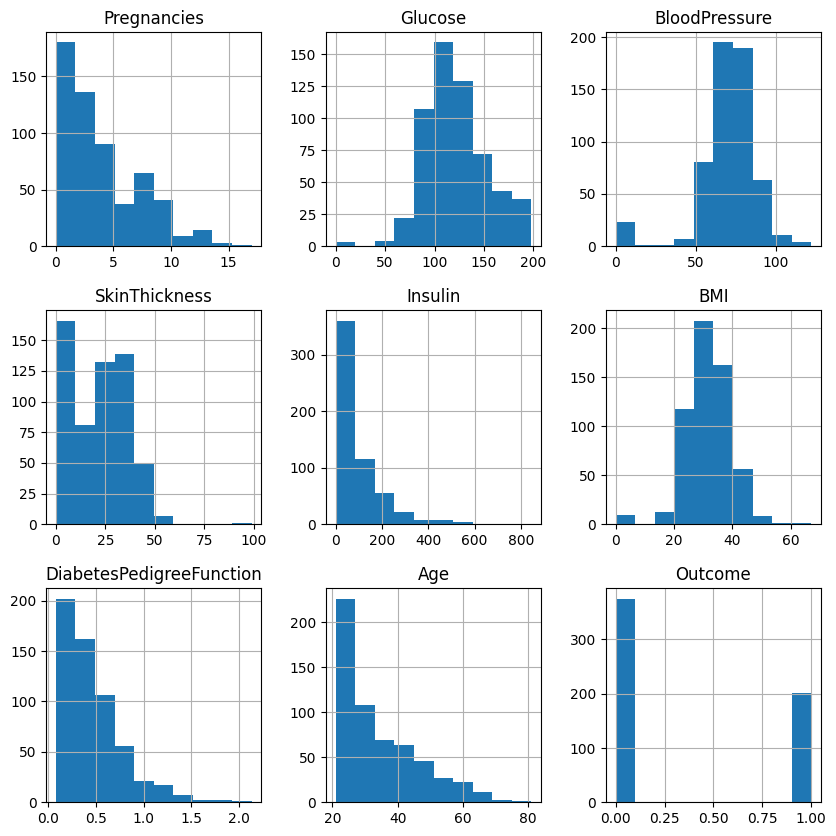

In [14]:
df_train.hist(figsize=(10,10))
plt.show()

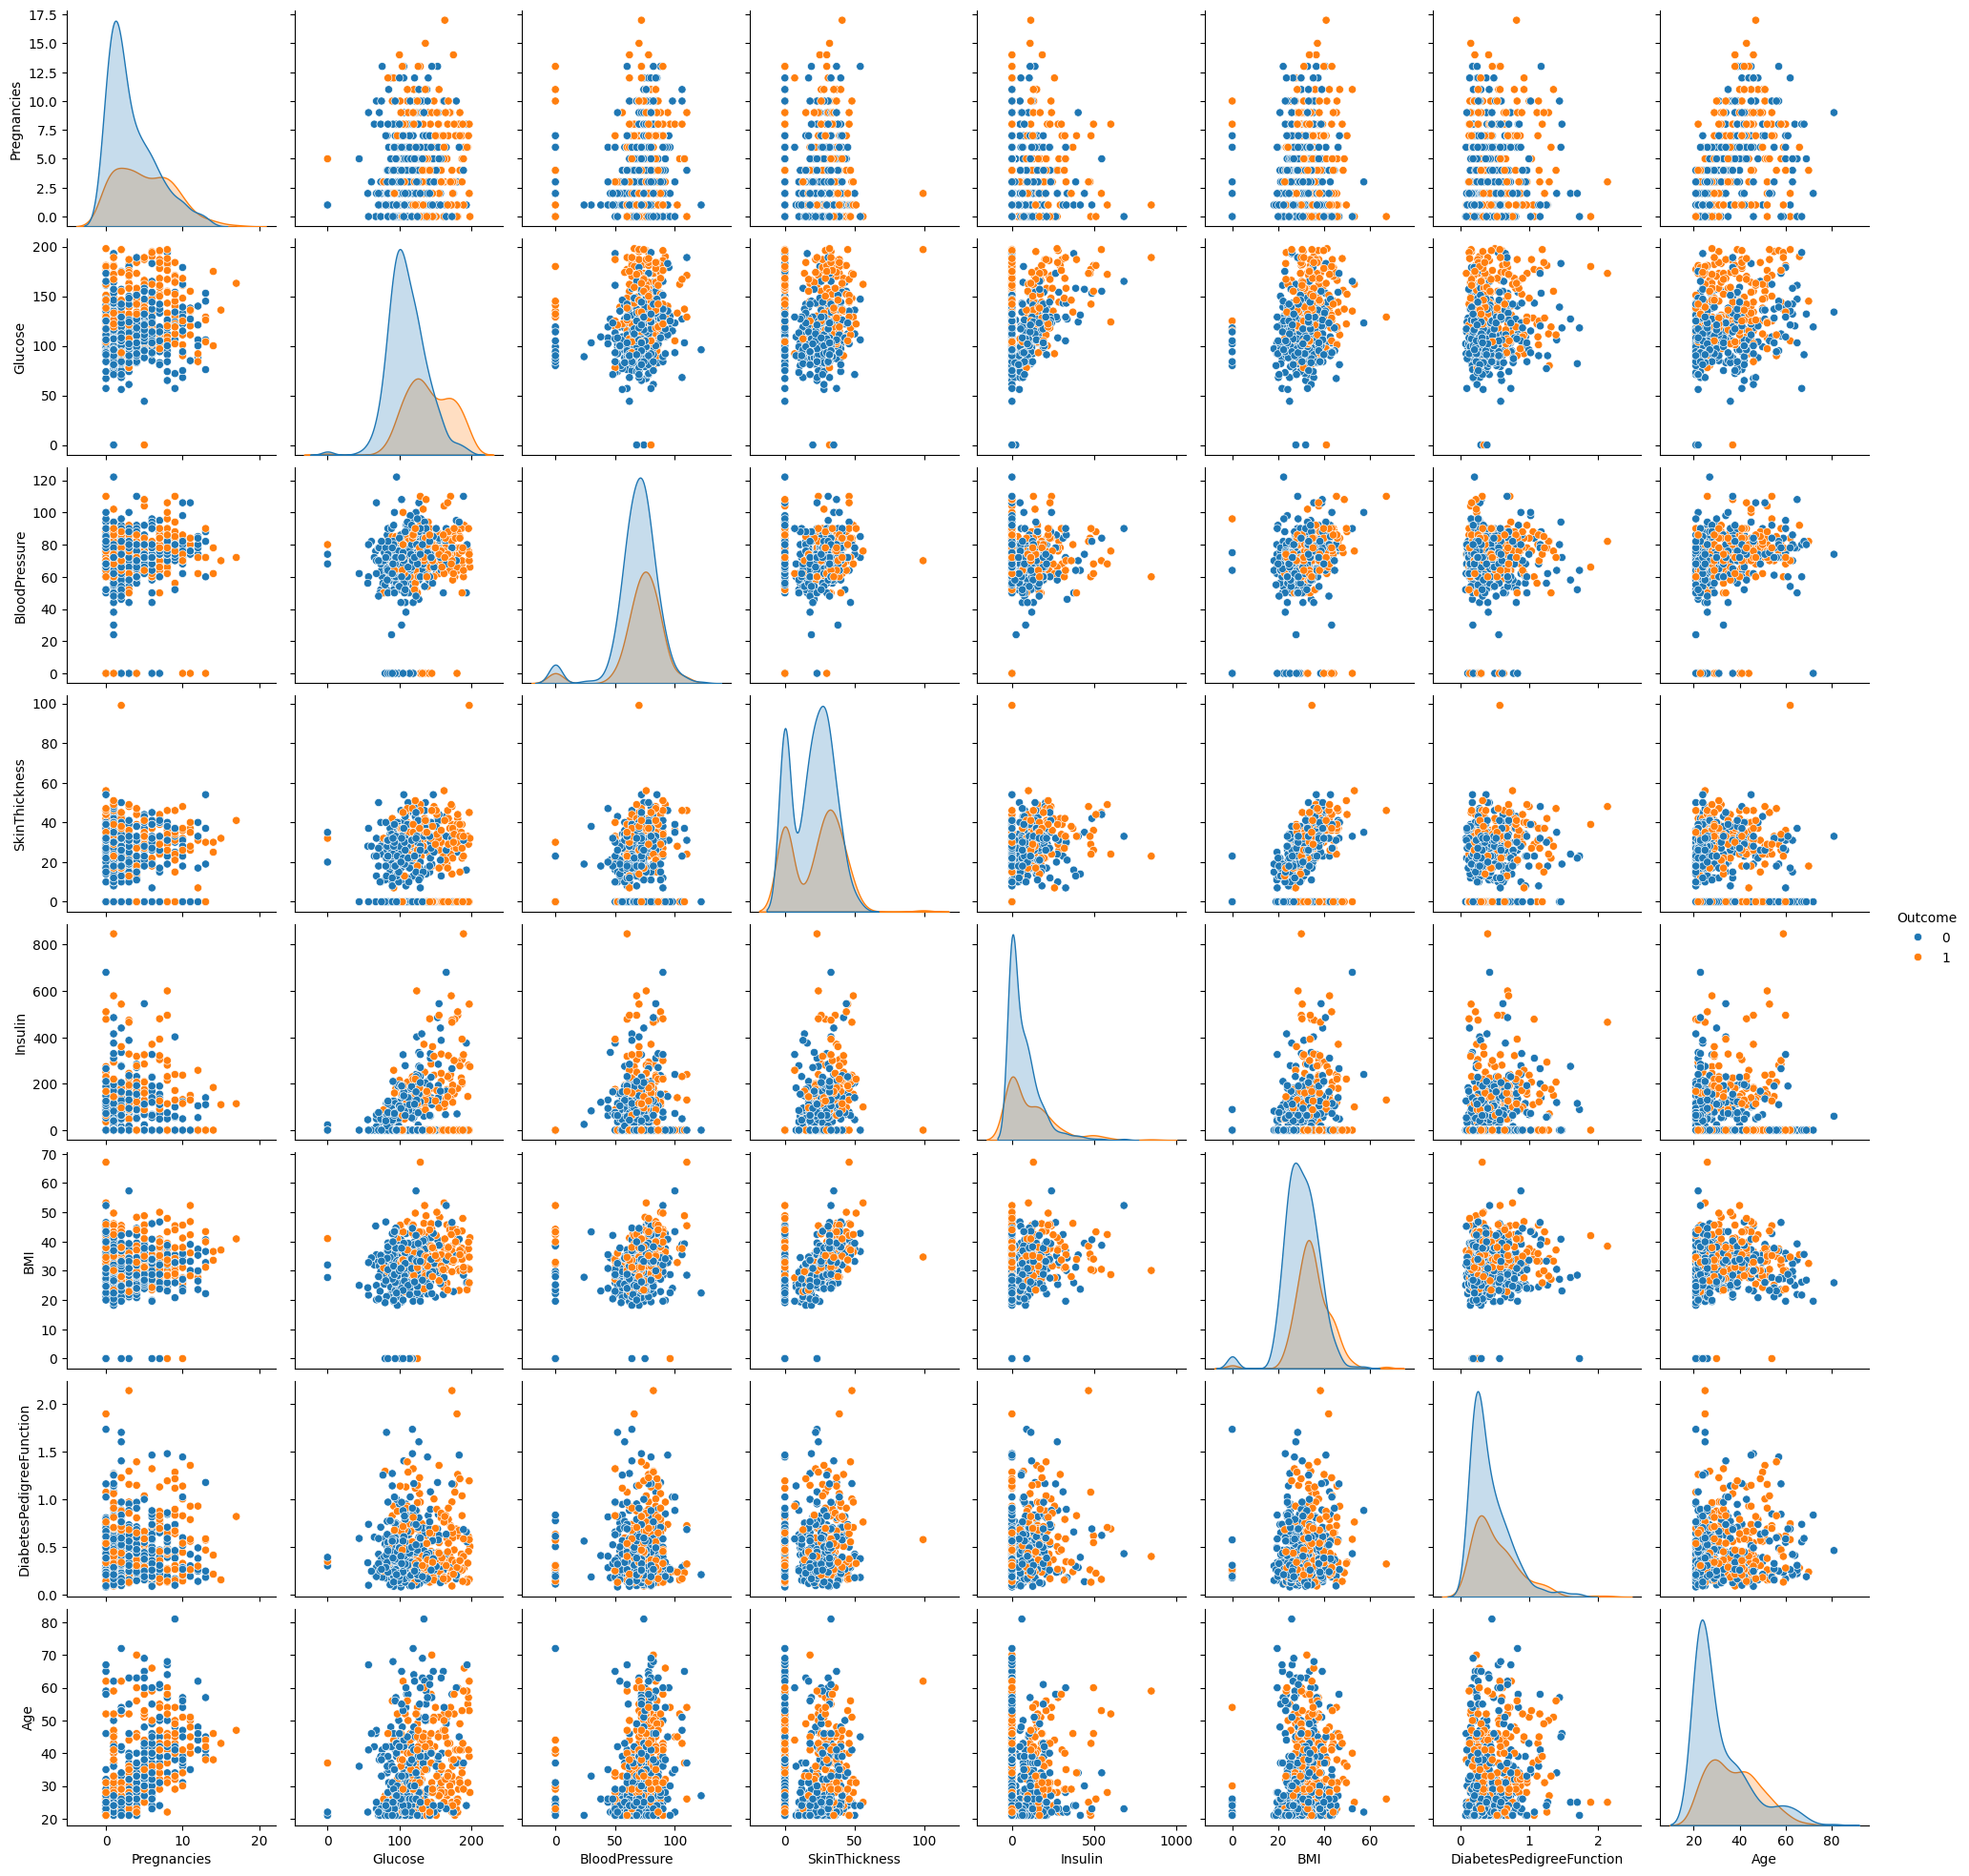

In [15]:
sns.pairplot(data=df_train, hue='Outcome')
plt.show()

In [16]:
# Se observa en el analisis bivariado que la combinacion de dos variables independientes no logra describir bien la variable
# independiente.

In [17]:
#Analisis de correlacion
df_train.select_dtypes('number').corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.157029,0.145507,-0.074931,-0.084637,0.037773,0.034070,0.532759,0.237557
Glucose,0.157029,1.000000,0.172951,0.051047,0.345127,0.209823,0.103061,0.284440,0.456346
BloodPressure,0.145507,0.172951,1.000000,0.198999,0.092771,0.313625,0.050334,0.229289,0.100724
SkinThickness,-0.074931,0.051047,0.198999,1.000000,0.432850,0.371755,0.171606,-0.093700,0.087604
Insulin,-0.084637,0.345127,0.092771,0.432850,1.000000,0.205819,0.201959,-0.025542,0.173646
BMI,0.037773,0.209823,0.313625,0.371755,0.205819,1.000000,0.088684,0.059875,0.295088
DiabetesPedigreeFunction,0.034070,0.103061,0.050334,0.171606,0.201959,0.088684,1.000000,0.060691,0.145724
Age,0.532759,0.284440,0.229289,-0.093700,-0.025542,0.059875,0.060691,1.000000,0.240565
Outcome,0.237557,0.456346,0.100724,0.087604,0.173646,0.295088,0.145724,0.240565,1.000000


In [18]:
#No se observa una correlacion importante entre las variables independientes.

In [19]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [20]:
model_dtc = DecisionTreeClassifier(random_state = 1640)
model_dtc.fit(X_train_sc, y_train)

DecisionTreeClassifier(random_state=1640)

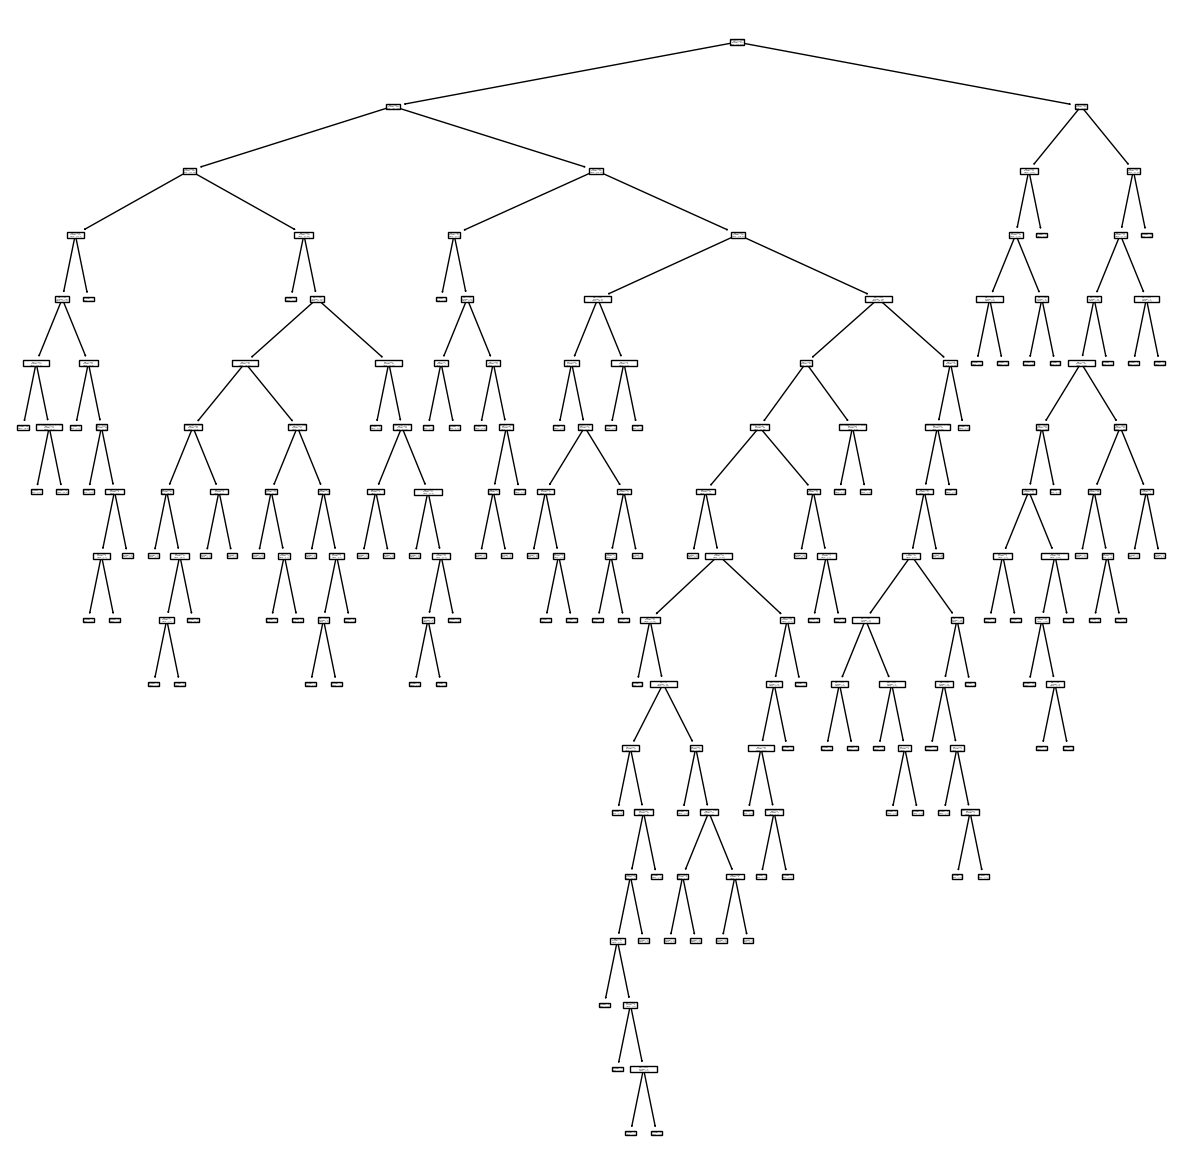

In [21]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model_dtc,feature_names=X_train.columns)
plt.show()

In [22]:
y_hat = model_dtc.predict(X_test_sc)

print(f'Accuracy: {accuracy_score(y_test,y_hat)}')

Accuracy: 0.7395833333333334


In [23]:
#Optimize the Model
DecisionTreeClassifier().get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [24]:
param_grid = {
    # RandomForestRegressor().get_params().keys()
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [3, 5, 7],
    'min_samples_leaf':[2,4,6],
    'random_state': [1650]
}

grid = GridSearchCV(model_dtc, param_grid, scoring = "accuracy", cv = 10)
grid

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1640),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'random_state': [1650]},
             scoring='accuracy')

In [25]:
grid.fit(X_train_sc, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1640),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [3, 5, 7],
                         'random_state': [1650]},
             scoring='accuracy')

In [26]:
print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 6, 'min_samples_split': 3, 'random_state': 1650}


In [27]:
model_grid = DecisionTreeClassifier(max_depth=5, min_samples_split=3, min_samples_leaf=6, random_state=1650)
model_grid.fit(X_train_sc, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=6, min_samples_split=3,
                       random_state=1650)

In [28]:
y_hat_model_grid = model_grid.predict(X_test_sc)

In [29]:
print(f'Accuracy: {accuracy_score(y_test,y_hat_model_grid)}')

Accuracy: 0.765625


In [30]:
import pickle
file_name = '../models/decisiontreeclasifier1650.pkl'
pickle.dump(model_grid, open(file_name, 'wb'))